# Package loading and basic configurations

# Querying enviroCar Tracks

In [4]:
%reload_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [9]:
bbox = BboxSelector([
    7.611165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=20) # requesting 50 tracks inside the bbox
track_df

,CO2.unit,CO2.value,Calculated MAF.unit,Calculated MAF.value,Consumption.unit,Consumption.value,Engine Load.unit,Engine Load.value,GPS Accuracy.unit,GPS Accuracy.value,...,sensor.fuelType,sensor.id,sensor.manufacturer,sensor.model,sensor.type,time,track.begin,track.end,track.id,track.length
0,kg/h,5.626691,g/s,7.283771,l/h,2.394336,%,47.156864,%,3.618905,...,gasoline,58395f40e4b0a979d45bd61b,Dodge,Caliber,car,2020-04-06T20:43:35,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,5e8baea465b80c5d6b4dbfbd,169.237435
1,kg/h,7.929576,g/s,10.264864,l/h,3.374287,%,57.130478,%,3.386111,...,gasoline,58395f40e4b0a979d45bd61b,Dodge,Caliber,car,2020-04-06T20:43:40,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,5e8baea465b80c5d6b4dbfbd,169.237435
2,kg/h,4.898223,g/s,6.340767,l/h,2.084350,%,22.004620,%,3.000000,...,gasoline,58395f40e4b0a979d45bd61b,Dodge,Caliber,car,2020-04-06T20:43:45,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,5e8baea465b80c5d6b4dbfbd,169.237435
3,kg/h,5.425340,g/s,7.023122,l/h,2.308655,%,35.564430,%,3.500000,...,gasoline,58395f40e4b0a979d45bd61b,Dodge,Caliber,car,2020-04-06T20:43:50,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,5e8baea465b80c5d6b4dbfbd,169.237435
4,kg/h,4.882005,g/s,6.319773,l/h,2.077449,%,40.345959,%,4.500000,...,gasoline,58395f40e4b0a979d45bd61b,Dodge,Caliber,car,2020-04-06T20:43:55,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,5e8baea465b80c5d6b4dbfbd,169.237435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,NaN,NaN,NaN,NaN,%,40.213574,%,4.026874,...,diesel,523c72d1e4b060b8865cf1d4,BMW,525,car,2019-12-10T08:11:17,2019-12-10T07:22:05Z,2019-12-10T08:11:37Z,5df148693bdb69186846bad7,40.461526
586,NaN,NaN,NaN,NaN,NaN,NaN,%,21.583306,%,3.447538,...,diesel,523c72d1e4b060b8865cf1d4,BMW,525,car,2019-12-10T08:11:22,2019-12-10T07:22:05Z,2019-12-10T08:11:37Z,5df148693bdb69186846bad7,40.461526
587,NaN,NaN,NaN,NaN,NaN,NaN,%,60.610872,%,3.000000,...,diesel,523c72d1e4b060b8865cf1d4,BMW,525,car,2019-12-10T08:11:27,2019-12-10T07:22:05Z,2019-12-10T08:11:37Z,5df148693bdb69186846bad7,40.461526
588,NaN,NaN,NaN,NaN,NaN,NaN,%,63.246544,%,3.457266,...,diesel,523c72d1e4b060b8865cf1d4,BMW,525,car,2019-12-10T08:11:32,2019-12-10T07:22:05Z,2019-12-10T08:11:37Z,5df148693bdb69186846bad7,40.461526


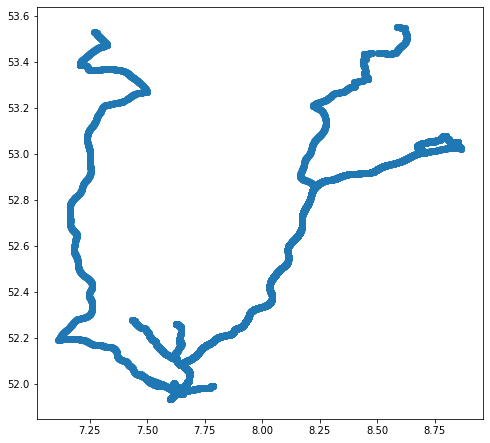

In [55]:
track_df.plot(figsize=(8, 10))

# summary statistics

In [39]:
import numpy as np

In [40]:
track_df.columns

Index(['CO2.unit', 'CO2.value', 'Calculated MAF.unit', 'Calculated MAF.value',
       'Consumption.unit', 'Consumption.value', 'Engine Load.unit',
       'Engine Load.value', 'GPS Accuracy.unit', 'GPS Accuracy.value',
       'GPS Altitude.unit', 'GPS Altitude.value', 'GPS Bearing.unit',
       'GPS Bearing.value', 'GPS HDOP.unit', 'GPS HDOP.value', 'GPS PDOP.unit',
       'GPS PDOP.value', 'GPS Speed.unit', 'GPS Speed.value', 'GPS VDOP.unit',
       'GPS VDOP.value', 'Intake Pressure.unit', 'Intake Pressure.value',
       'Intake Temperature.unit', 'Intake Temperature.value', 'MAF.unit',
       'MAF.value', 'O2 Lambda Voltage ER.unit', 'O2 Lambda Voltage ER.value',
       'O2 Lambda Voltage.unit', 'O2 Lambda Voltage.value', 'Rpm.unit',
       'Rpm.value', 'Speed.unit', 'Speed.value', 'Throttle Position.unit',
       'Throttle Position.value', 'geometry', 'id', 'sensor.constructionYear',
       'sensor.engineDisplacement', 'sensor.fuelType', 'sensor.id',
       'sensor.manufacturer', 's

In [42]:
track_df.describe()

,CO2.value,Calculated MAF.value,Consumption.value,Engine Load.value,GPS Accuracy.value,GPS Altitude.value,GPS Bearing.value,GPS HDOP.value,GPS PDOP.value,GPS Speed.value,...,O2 Lambda Voltage.value,Rpm.value,Speed.value,Throttle Position.value,sensor.constructionYear,sensor.engineDisplacement,track.length,lat,lng,speed
count,11020.000000,11020.000000,11020.000000,12315.000000,12332.000000,12332.000000,12303.000000,11237.000000,11237.000000,12332.000000,...,1095.000000,12315.000000,12315.000000,12115.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12315.000000
mean,19.605949,25.379971,8.342957,51.718541,2.164513,87.437767,150.225603,0.567556,1.075705,82.381859,...,0.670338,2311.836698,81.470060,29.067010,2007.783814,1803.041518,149.163815,52.453744,7.887676,81.470060
std,12.162856,15.744860,5.175683,24.351280,1.428757,27.866227,106.859615,0.248852,0.552975,46.020793,...,0.302914,975.923946,45.226743,20.120237,2.311758,91.863559,75.588258,0.470145,0.420753,45.226743
min,-2.563380,-3.318304,-1.090800,-495.792866,1.000000,30.999999,0.000000,0.400000,0.800000,0.000000,...,0.041240,-183.913050,0.000000,10.000000,2007.000000,1395.000000,1.561091,51.934327,7.113174,0.000000
25%,8.549539,11.067409,3.638102,34.221333,1.500000,69.000000,45.702598,0.400000,0.837052,47.539286,...,0.428791,1509.967685,47.000001,17.242937,2007.000000,1798.000000,142.209935,52.002597,7.646013,47.000001
50%,18.091673,23.419735,7.698584,52.111692,1.500000,93.000000,170.776128,0.600000,1.000000,83.917169,...,0.587886,2180.233333,83.000000,22.000001,2007.000000,1798.000000,169.237435,52.276080,7.696748,83.000000
75%,29.038578,37.590541,12.356841,69.411764,2.500000,103.000000,223.200000,0.600000,1.166860,124.369941,...,0.860665,3240.377420,122.999996,29.000000,2007.000000,1798.000000,219.767934,52.897261,8.173459,122.999996
max,55.680724,72.078894,23.693925,100.000003,15.036181,195.999997,359.892290,5.444747,40.292816,174.567824,...,1.247910,4530.827519,373.333340,89.000003,2018.000000,1995.000000,233.951996,53.551754,8.864959,373.333340


# Inspecting a single Track

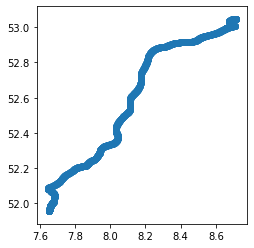

In [32]:
some_track_id = track_df['track.id'].unique()[4]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

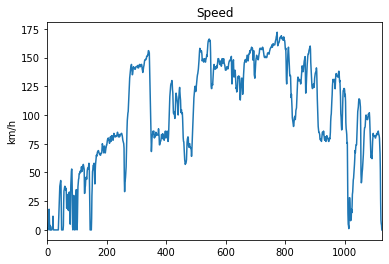

In [14]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

# Visualisation of another single track using Matplotlib

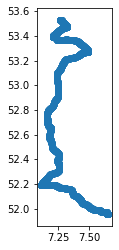

In [35]:
some_track_id_1 = track_df['track.id'].unique()[10]
some_track_1 = track_df[track_df['track.id'] == some_track_id_1]
some_track_1.plot()

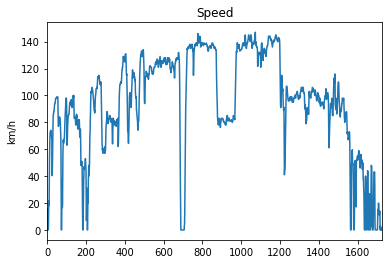

In [48]:
bx = some_track_1['Speed.value'].plot()
bx.set_title("Speed")
bx.set_ylabel(some_track_1['Speed.unit'][0])
bx

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [47]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=7)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Visualisation of another single track using Folium

In [46]:
import folium

lats = list(some_track_1['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track_1['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

Q = folium.Map(location=[avg_lat, avg_lngs], zoom_start=7)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(Q)
Q

# Example: Visualization with pydeck
#### for one track

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [54]:
import pydeck as pdk

# for pydeck the attributes have to be flat
some_track['lat'] = some_track['geometry'].apply(lambda coord: coord.y)
some_track['lng'] = some_track['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(some_track)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.62968338012695,
    latitude=51.96034447467065,
    zoom=13,
    min_zoom=8,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, mapbox_key= 'pk.eyJ1IjoibTIwMTkwNjQ5IiwiYSI6ImNrOTJzZTN4aDA2d2UzZnBnYWJsdWJuMzEifQ.-D3TfGOYZdjqFZrG8qlWhA'
)
r.to_html('tracks_muenster.html', iframe_width=900)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'C:\\Users\\Edwige\\Desktop\\tracks_muenster.html'